Scenario: You are a data analyst working with a dataset of global weather. Your task is to analyze temperature trends and visualize the results.

Tasks:

1. Data Preparation:

Hint 1: Use np.random.uniform(low, high, size) to generate the temperature data.
Hint 2: Create a DataFrame using pd.DataFrame(data, index, columns) with appropriate index and columns.

Use NumPy to generate a synthetic dataset representing average monthly temperatures (in degrees Celsius) for 12 months across 10 different cities. The temperatures should range from -5 to 35 degrees.

Convert this NumPy array into a Pandas DataFrame, adding city names as index and months as columns.

In [3]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from faker import Faker

# Generate the temperature array with float numbers rounded to first decimal
np.random.seed(0)
temperatures_array = np.around(np.random.uniform(-5.0, 35.0, 120), 1).reshape(10, 12)

# Create DataFrame with:
# - rows (index) from original columns (0 to 9)
# - columns from original row indices (0 to 11)
fake = Faker()
Faker.seed(0)

temperatures_df = pd.DataFrame(
    temperatures_array,
    index=[fake.city() for _ in range(temperatures_array.shape[0])],        # generates bogus city names as rows
    columns=[f"{calendar.month_name[j+1]}" for j in range(temperatures_array.shape[1])]       # returns month name based on column index
)

print(temperatures_df)


                    January  February  March  April   May  June  July  August  \
Changchester           17.0      23.6   19.1   16.8  11.9  20.8  12.5    30.7   
West Tammyfort         17.7      32.0   -2.2   -1.5  -4.2  28.3  26.1    29.8   
Hullport               -0.3      20.6    0.7   32.8  15.9  11.6   5.6    26.0   
Howardborough          19.5      19.7   32.7   22.3   9.4  12.5  22.9    -2.6   
West Donald             7.6       9.5   17.8   12.5  34.5  -0.9   3.4     1.5   
New Laurenside          1.4      -0.6   21.3    0.5   2.9   9.7  27.8    -1.1   
West Corey             34.1      19.2   24.6   -3.4   6.3  -0.2   6.8    -0.3   
Port Gabriellafort     17.7       5.6   15.9   -1.2  18.0  32.2   7.7    21.7   
West Ryanborough       18.5      -4.2   28.2   -4.8  22.1   5.8  24.4    33.5   
Ramoshaven              3.9      33.1   12.9   28.9  23.0   6.9  27.6    10.9   

                    September  October  November  December  
Changchester             33.5     10.3      26.

2. Data Analysis:

Hint 1: Calculate the annual average temperature using DataFrame.mean(axis).
Hint 2: Find the city with the highest and lowest average temperature using idxmax() and idxmin() methods.

Calculate the annual average temperature for each city.

Identify the city with the highest and lowest average temperature for the year.

In [6]:
#Calulation of average temperature for each city
annual_average_temperature = temperatures_df.mean(axis=1)
print(annual_average_temperature)

#Extraction of city with the lowest average temperature
coldest_city = annual_average_temperature.idxmin()
print(f"City with lowest average temperature: {coldest_city}")

#Extraction of city with the lowest average temperature
hottest_city = annual_average_temperature.idxmax()
print(f"City with highest average temperature: {hottest_city}")


Changchester          19.925000
West Tammyfort        18.900000
Hullport              13.275000
Howardborough         15.291667
West Donald           10.883333
New Laurenside        11.416667
West Corey            10.558333
Port Gabriellafort    12.541667
West Ryanborough      15.258333
Ramoshaven            20.725000
dtype: float64
City with lowest average temperature: West Corey
City with highest average temperature: Ramoshaven


3. Data Visualization:

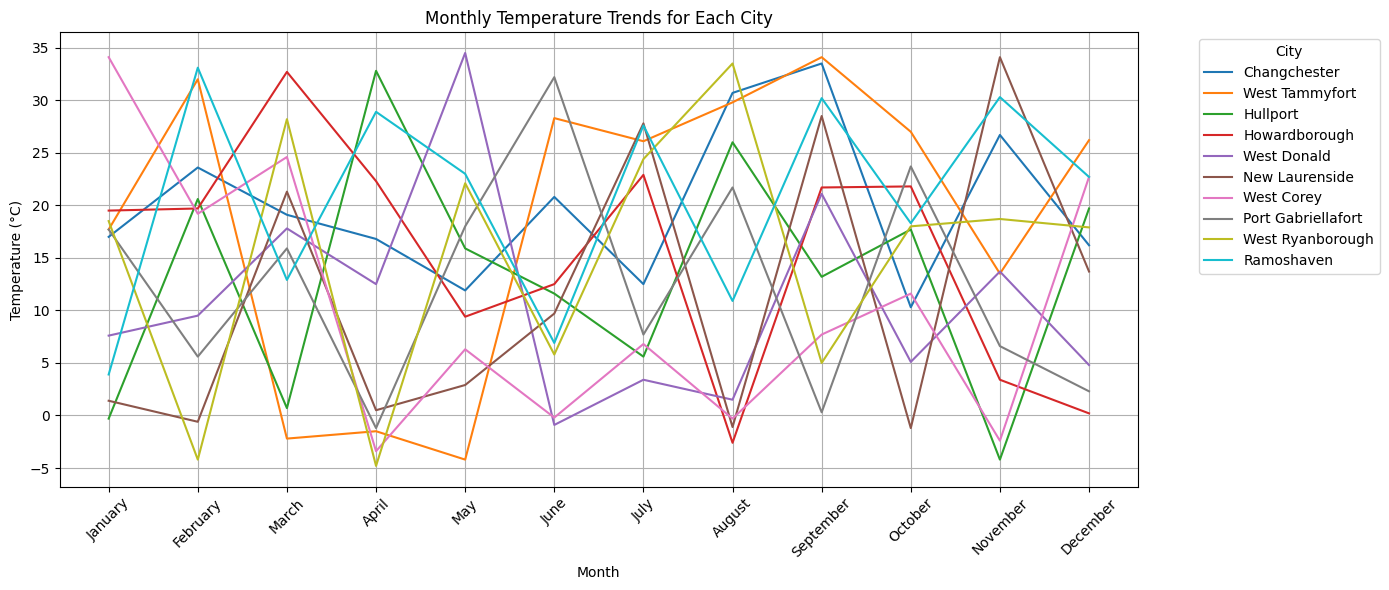

In [7]:
# Plot line chart: index (cities) as separate lines, columns (months) on x-axis
temperatures_df.T.plot(figsize=(14, 6))  # Transpose so months are x-axis and cities are lines

plt.xlabel('Month')
#Force all labels to appear
plt.xticks(ticks=range(len(temperatures_df.columns)), labels=temperatures_df.columns, rotation=45)

plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Trends for Each City')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()


A brief report within the notebook summarizing your findings, including the city with the highest and lowest average temperatures and any interesting trends observed in the data

On this occurence,
1. City with lowest average temperature is West Corey
2. City with lowest average temperature is Ramoshaven

I can't seem to identify any trend worth mentionning and investigating further:
- no peculiar long-term growth or decline
- no "seasonality"
- no group of cities showing "similar" curves